### Import The Libraries And Dataset

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from  sklearn.model_selection import train_test_split  

In [3]:
df = pd.read_csv('heart.csv')
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


### Top 5 Rows of The Dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Column Names
age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

 ### Number of Rows And Number of Columns

In [5]:
df.shape

(1025, 14)

In [10]:
print("Number of Rows :" ,df.shape[0])
print("Number of Columns :" ,df.shape[1])

Number of Rows : 1025
Number of Columns : 14


### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Check Null Values In The Dataset

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check For Duplicate Data and Drop Them

In [15]:
df.duplicated().sum()

723

In [16]:
df = df.drop_duplicates()

In [19]:
df.shape

(302, 14)

### Get Overall Statistics About The Dataset

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Draw Correlation Matrix 

<Axes: >

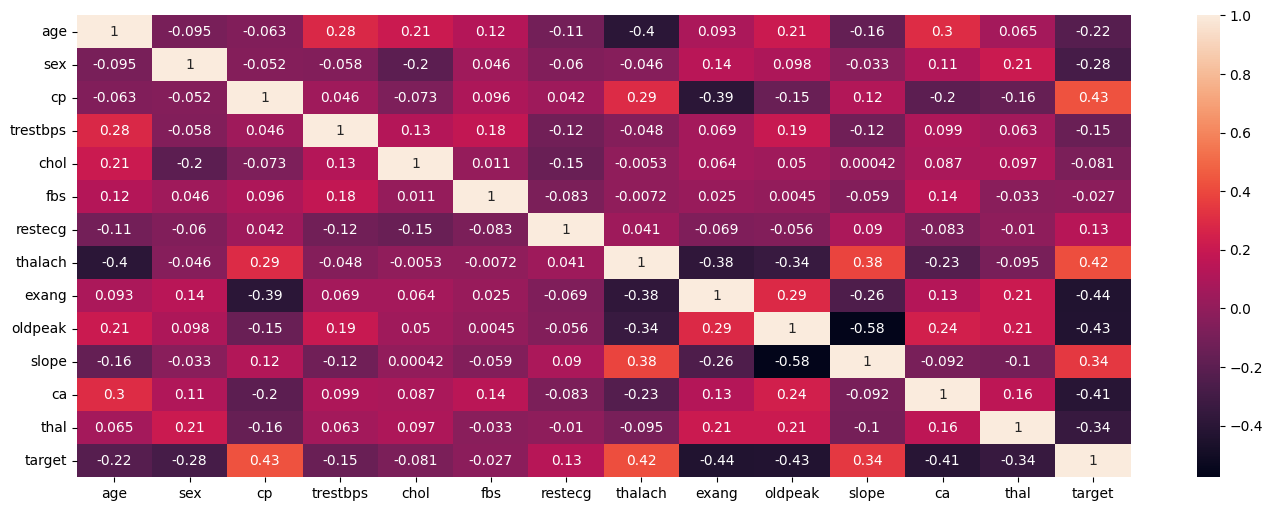

In [24]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

### How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

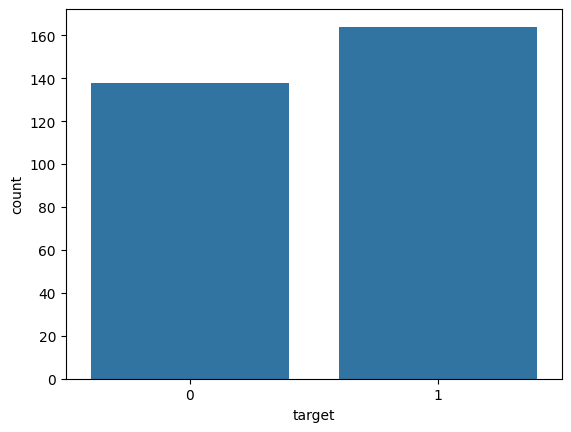

In [37]:
sns.countplot(x=df['target'])

### Find Count of  Male & Female in this Dataset

In [38]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

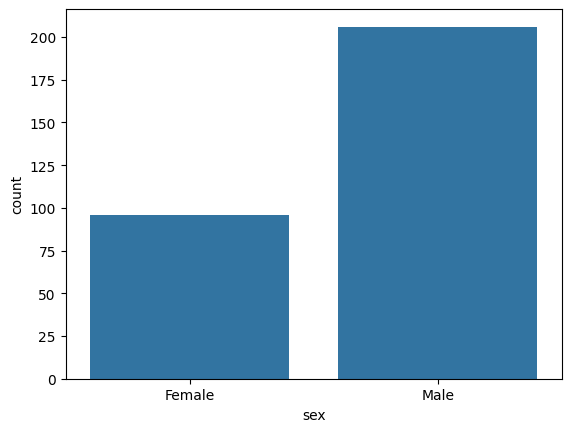

In [40]:
sns.countplot(x=df['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

### Find Gender Distribution According to The Target Variable

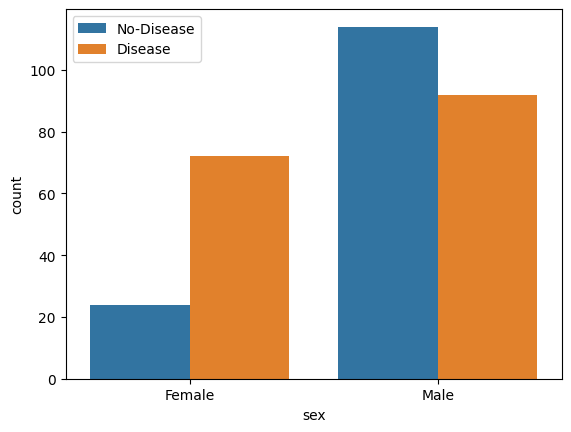

In [44]:
sns.countplot(x='sex',hue='target',data=df)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Check Age Distribution In The Dataset

<Axes: ylabel='Density'>

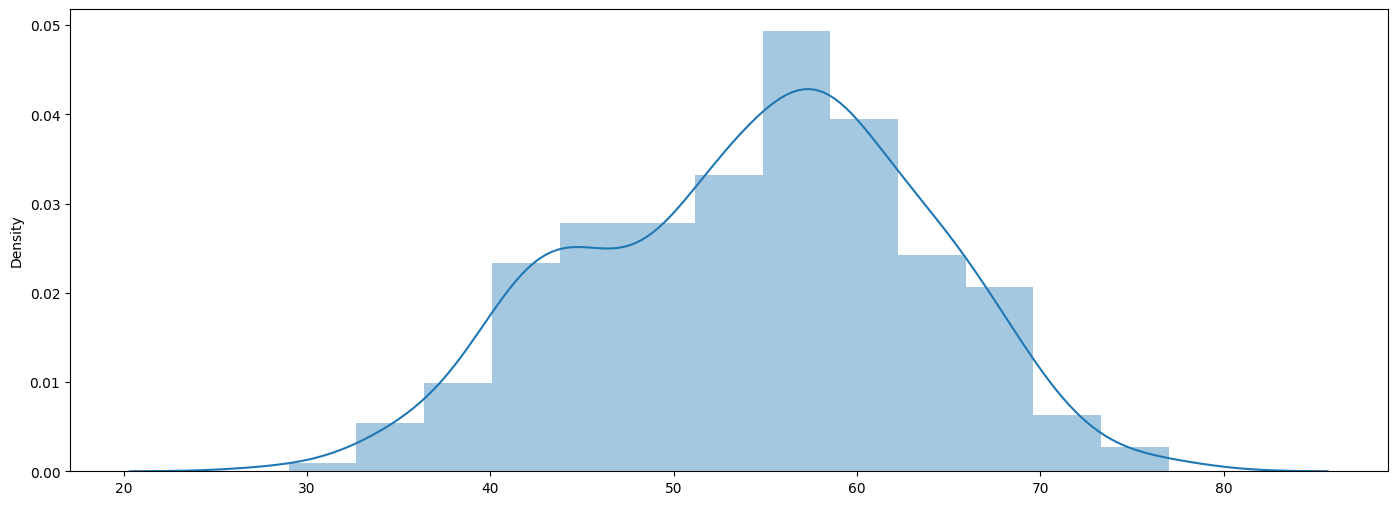

In [53]:
plt.figure(figsize=(17,6))
sns.distplot(x=df['age'])

### Check Chest Pain type

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

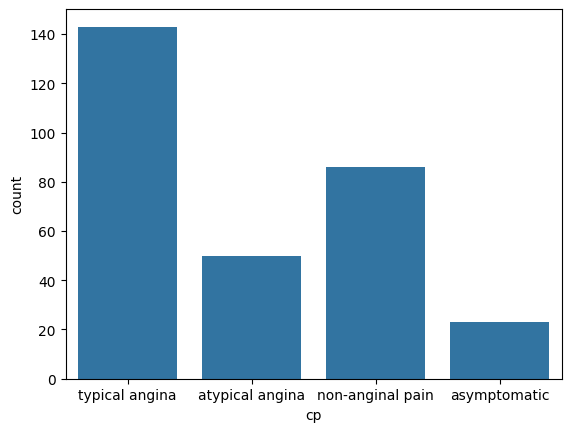

In [57]:
sns.countplot(x=df['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

### Show The Chest Pain Distribution As Per Target Variable

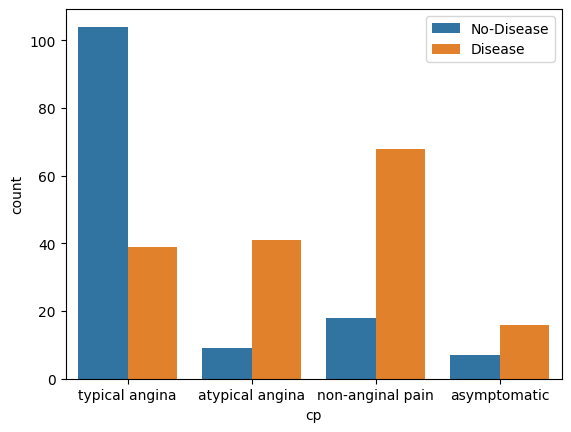

In [58]:
sns.countplot(x=df['cp'],hue=df['target'],data=df)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

###  Show Fasting Blood Sugar Distribution According To Target Variable

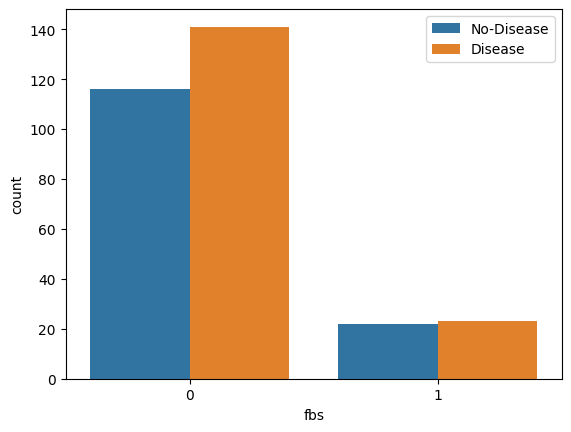

In [61]:
sns.countplot(x=df['fbs'],hue=df['target'],data=df)
plt.xticks([0,1])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Check Resting Blood Pressure Distribution

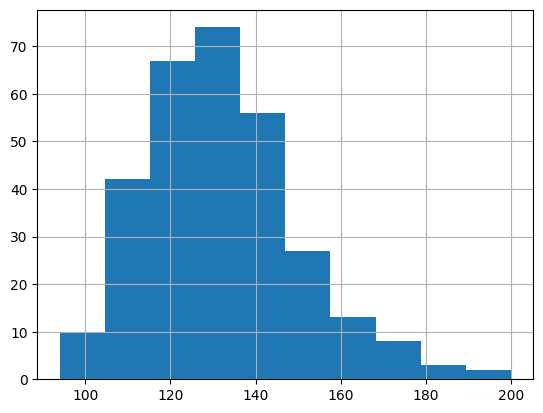

In [63]:
df['trestbps'].hist()
plt.show()

###  Compare Resting Blood Pressure As Per Sex Column

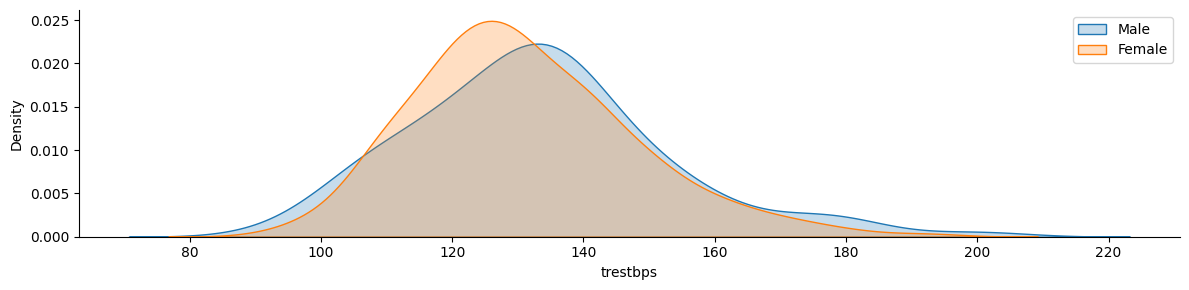

In [69]:
g = sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.show()

### Show Distribution of Serum cholestero

<Axes: >

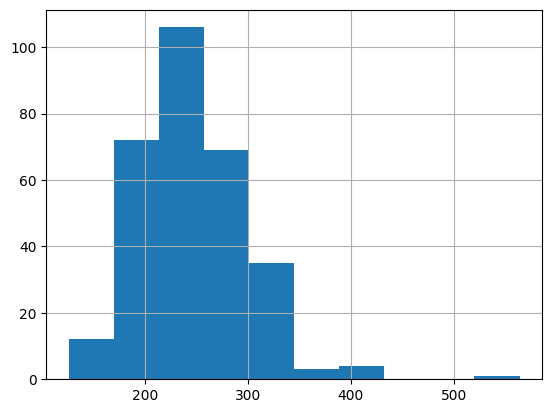

In [70]:
df['chol'].hist()

### Plot Continuous Variables

In [72]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [81]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [80]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [82]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

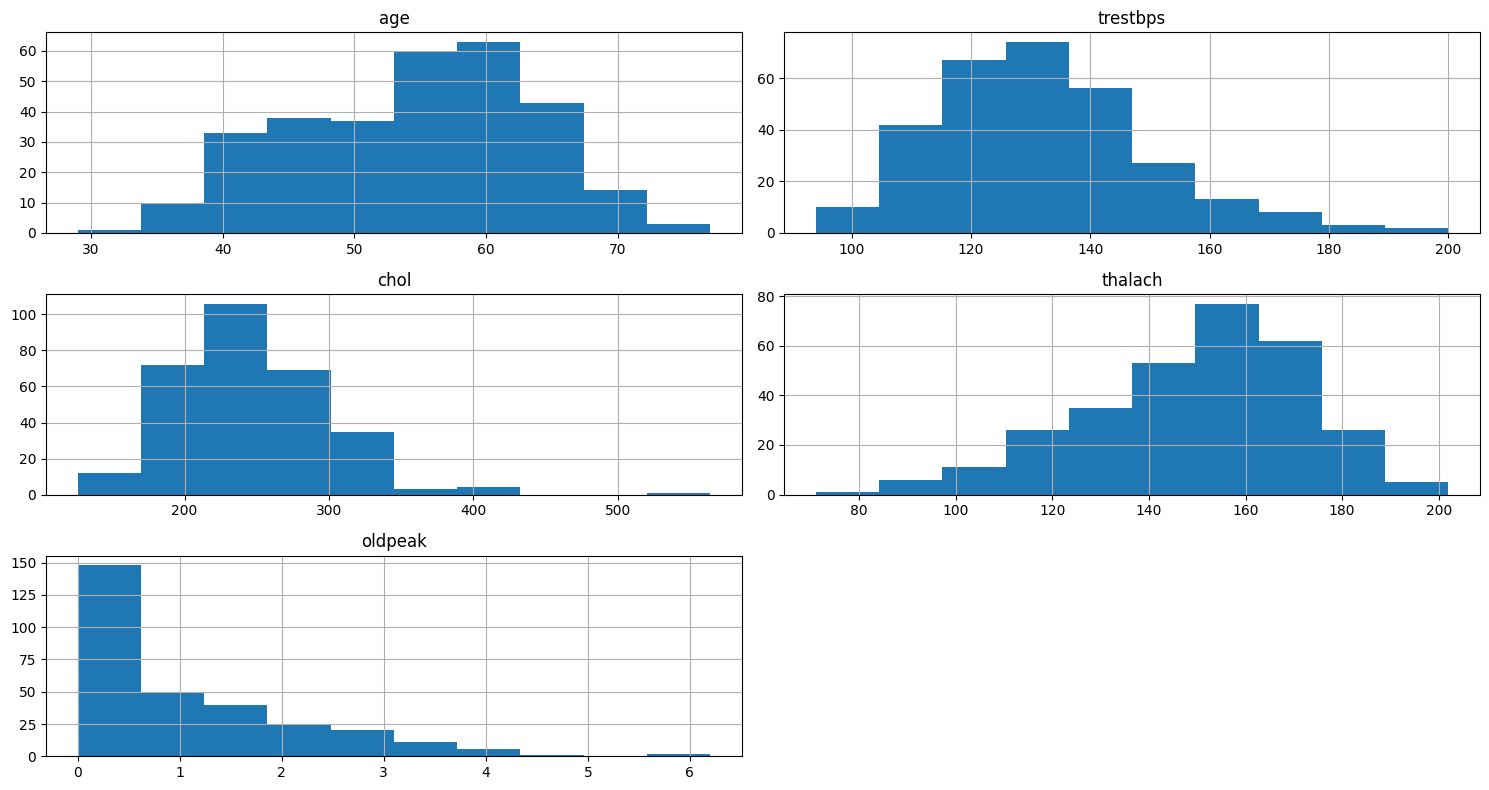

In [91]:
df.hist(cont_val,figsize= (15,8))
plt.tight_layout()
plt.show()

# Prediction of Heart Attack
### Encoding Categorical Data

In [94]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [96]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [108]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns=cate_val,drop_first=True) # drop_first=True 'to remove dummy var trap'

In [110]:
df = df.astype(int)

In [111]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


#  Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [115]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [116]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0.216620,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,2.085738,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.151179,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.717939,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.216620,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting The Dataset Into The Training Set And Test Set

In [121]:
x  = df.drop(columns='target',axis=1)
y = df['target']

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [129]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [130]:
y_pred = log.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test,y_pred)

0.7868852459016393

## SVC

In [135]:
from sklearn import svm

In [137]:
svm = svm.SVC()

In [138]:
svm.fit(x_train,y_train)

SVC()

In [139]:
y_pred1 = svm.predict(x_test)

In [141]:
accuracy_score(y_test,y_pred1)

0.8032786885245902

## KNeighbors Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [153]:
# score = []
# for k in range(1,40):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train,y_train)
#     y_pred2 = knn.predict(x_test)
#     score.append(accuracy_score(y_test,y_pred2))
# print(score)

[0.7377049180327869, 0.7868852459016393, 0.7377049180327869, 0.7540983606557377, 0.7377049180327869, 0.7868852459016393, 0.7377049180327869, 0.7868852459016393, 0.7704918032786885, 0.7540983606557377, 0.7540983606557377, 0.7540983606557377, 0.7540983606557377, 0.7704918032786885, 0.7377049180327869, 0.8032786885245902, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7213114754098361, 0.7540983606557377, 0.7377049180327869, 0.7540983606557377, 0.7049180327868853, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7213114754098361, 0.7377049180327869, 0.7213114754098361]


## Non-Linear ML Algorithmn

In [211]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [212]:
df = df.drop_duplicates()

In [213]:
df.shape

(302, 14)

In [214]:
x = df.drop('target',axis=1)
y = df['target']

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Decision Tree Classifier

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
dt = DecisionTreeClassifier()

In [234]:
dt.fit(x_train,y_train)
y_pred3 = dt.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8032786885245902

## Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf = RandomForestClassifier()

In [237]:
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)
accuracy_score(y_test,y_pred4)

0.8360655737704918

# Gradient Boosting Classifier

In [238]:
from sklearn.ensemble import GradientBoostingClassifier

In [239]:
gb  = GradientBoostingClassifier()

In [240]:
gb.fit(x_train,y_train)
y_pred5 = gb.predict(x_test)
accuracy_score(y_test,y_pred5)

0.8032786885245902

In [242]:
final_data = pd.DataFrame(
    {
    'Models' : ['LOG','SVC','KNN','DT','RF','GB'], 
        'ACC' : [
            accuracy_score(y_test,y_pred),
            accuracy_score(y_test,y_pred1),
            accuracy_score(y_test,y_pred2),
            accuracy_score(y_test,y_pred3),
            accuracy_score(y_test,y_pred4),
            accuracy_score(y_test,y_pred5)]})
final_data         

,Models,ACC
0,LOG,0.786885
1,SVC,0.803279
2,KNN,0.721311
3,DT,0.803279
4,RF,0.836066
5,GB,0.803279


<Axes: xlabel='Models', ylabel='ACC'>

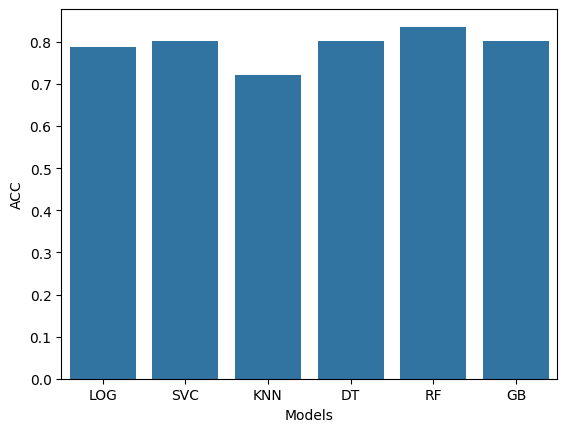

In [247]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

# Prediction on New Data

In [248]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [249]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


## save model using joblib

In [250]:
import joblib

In [251]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [252]:
model = joblib.load('model_joblib_heart')

In [253]:
model.predict(new_data)

array([0], dtype=int64)

In [255]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## GUI

In [256]:
from tkinter import *
import joblib

In [257]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Attack Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()